In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set_theme() 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [117]:
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

In [118]:
# reading csv files
data =  pd.read_csv("SeoulBikeData.csv", encoding="latin-1")
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [119]:
data.shape

(8760, 14)

#### Renommage des colonnes

In [120]:
data.rename(columns = {"Rented Bike Count":"Rented_bike_count","Temperature(°C)" : "Temperature", "Humidity(%)": "Humidity", "Wind speed (m/s)": "Wind_speed", "Visibility (10m)":"Visibility", "Dew point temperature(°C)": "Dew_point_temperature", "Solar Radiation (MJ/m2)": "Solar_Radiation", "Rainfall(mm)": "Rainfall", "Snowfall (cm)": "Snowfall"}, inplace=True)
data

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [121]:
data[data.isna()].sum()

Date                     0.0
Rented_bike_count        0.0
Hour                     0.0
Temperature              0.0
Humidity                 0.0
Wind_speed               0.0
Visibility               0.0
Dew_point_temperature    0.0
Solar_Radiation          0.0
Rainfall                 0.0
Snowfall                 0.0
Seasons                  0.0
Holiday                  0.0
Functioning Day          0.0
dtype: float64

In [122]:
data[(data["Rented_bike_count"]!=0) & (data["Functioning Day"]=="No")]

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


Il n'y a pas de vélo loué lorsque lorsque ce n'est pas un jour de fonctionnement. On peut donc supprimer les ces lignes et ensuite supprimer la colonne entière.

In [123]:
data = data[data["Functioning Day"]=="Yes"]

In [124]:
data = data.drop(columns="Functioning Day")
data

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [125]:
data.groupby("Hour").mean()["Rented_bike_count"].to_frame() #Moyenne de vélos loués par heure.

,Rented_bike_count
Hour,
0,561.457386
1,441.923295
2,312.769886
3,210.840909
4,137.488636
5,144.218750
6,298.184659
7,626.606232
8,1050.229462


# DATA VIZUALISATIONS

### Nombre de vélos loués selon la saison  

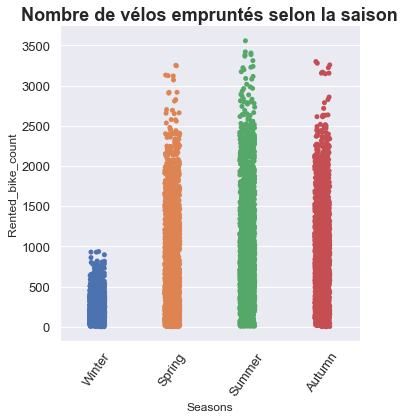

In [126]:
#Nombre de vélos empruntés selon la saison 
sns.catplot(x="Seasons",y="Rented_bike_count",data=data)
fontsize=18
plt.xticks(rotation=55,fontsize = 13)
plt.yticks(fontsize=13)
plt.title("Nombre de vélos empruntés selon la saison",fontweight="bold",fontdict={'fontsize': fontsize});

## Proportions de vélos loués selon la période de vacances/ période de travail 

In [127]:
data_holiday = data.groupby("Holiday").sum()["Rented_bike_count"].reset_index()

In [128]:
data_holiday["Prop"]=data_holiday["Rented_bike_count"]/data_holiday["Rented_bike_count"].sum()

In [14]:
#functionning_day_or_not = data["Functioning Day"].value_counts()

trace1 = go.Pie(
     values= data_holiday["Prop"],
     labels=data_holiday["Holiday"],
     hoverinfo="label+percent+name",
)
#trace2 = go.Pie(
#     values= functionning_day_or_not.values,
 #    labels= ["Open days","Closed days"],
  #   hoverinfo="label+percent+name",
#)
layout = go.Layout(title="Pourentage de vélos loués selon si c'est les vacances ou non/ jour de travail ou non ",)
dt = [trace1]
fig = go.Figure(data=dt, layout=layout)
py.plot(fig, filename='simple-pie-subplot')

C:\Users\hhp\anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `simple-pie-subplot` didn't end with .html. Adding .html to the end of your file.



'simple-pie-subplot.html'

#### Récupération du mois de l'année et du jour de la location pour exploitation 

In [129]:
import datetime as dt
data["Date"]=pd.to_datetime(data["Date"]) #Convert string to datetime
data["Year"] = data.Date.dt.year
data["Month"] = data.Date.dt.month
data["Day"] = data.Date.dt.day

### Nombre de vélos loués selon le mois de l'année

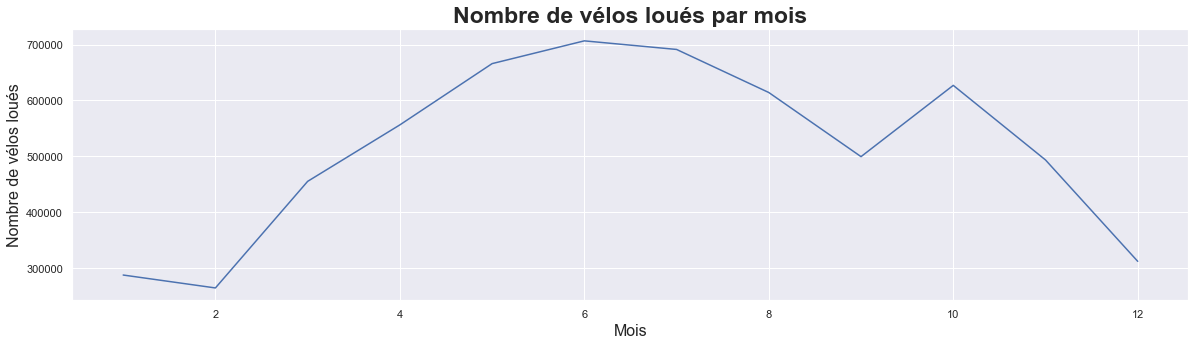

In [130]:

rental_by_month= data.groupby("Month").sum()["Rented_bike_count"].reset_index()
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(data=rental_by_month, x="Month", y="Rented_bike_count");
plt.title("Nombre de vélos loués par mois", fontsize=23, fontweight="bold");
plt.xlabel('Mois', fontsize=16);
plt.ylabel('Nombre de vélos loués', fontsize=16);

In [131]:
data_h = data.groupby("Hour").mean()["Rented_bike_count"]
data_h

Hour
0      561.457386
1      441.923295
2      312.769886
3      210.840909
4      137.488636
5      144.218750
6      298.184659
7      626.606232
8     1050.229462
9      667.943343
10     545.764873
11     621.277620
12     723.218130
13     758.172805
14     784.620397
15     857.373938
16     962.257790
17    1177.212465
18    1554.016997
19    1235.776204
20    1105.303116
21    1066.512748
22     954.167139
23     693.940510
Name: Rented_bike_count, dtype: float64

Text(0.5, 1.0, 'Proportion de vélo loué par heure')

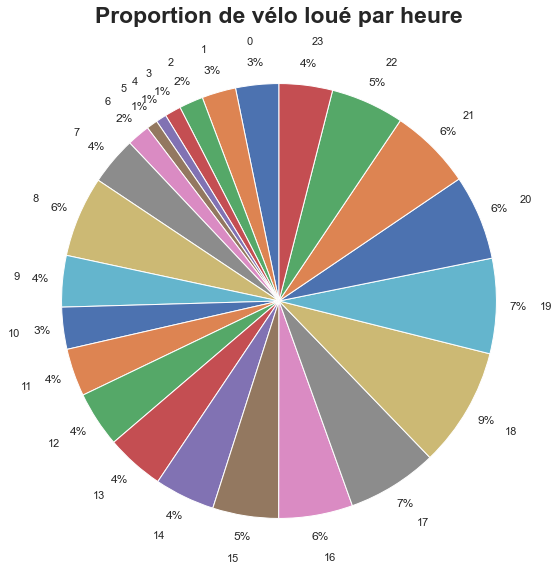

In [132]:
#data.groupby("Hour").mean()["Rented_bike_count"].plot(kind='pie', y="Rented_bike_count",legend=False,title="popularité moyenne par langues",autopct='%1.0f%%')

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

edge= ax.pie(data_h, labels=data_h.index,labeldistance=1.2, autopct='%.0f%%',pctdistance=1.1,startangle=90)

for a in edge[0]:
    a.set_edgecolor('white')

plt.title("Proportion de vélo loué par heure", fontsize=23, fontweight="bold")

In [133]:
data_j = data.groupby("Day").mean()["Rented_bike_count"].to_frame()
data_j

,Rented_bike_count
Day,
1,222.437500
2,186.437500
3,409.072917
4,645.571970
5,890.231061
6,1289.218750
7,947.756944
8,860.479167
9,1163.215278


In [134]:
import plotly.express as px

fig = px.line(x=data_j.index,y=data_j["Rented_bike_count"], labels={'x':'Jour', 'y':'Nombre de vélo loué'},title="Moyenne de vélos loués en fonction du jour")
fig.show()

# Corrélation et analyse statistique

### Matrice des corréaltions

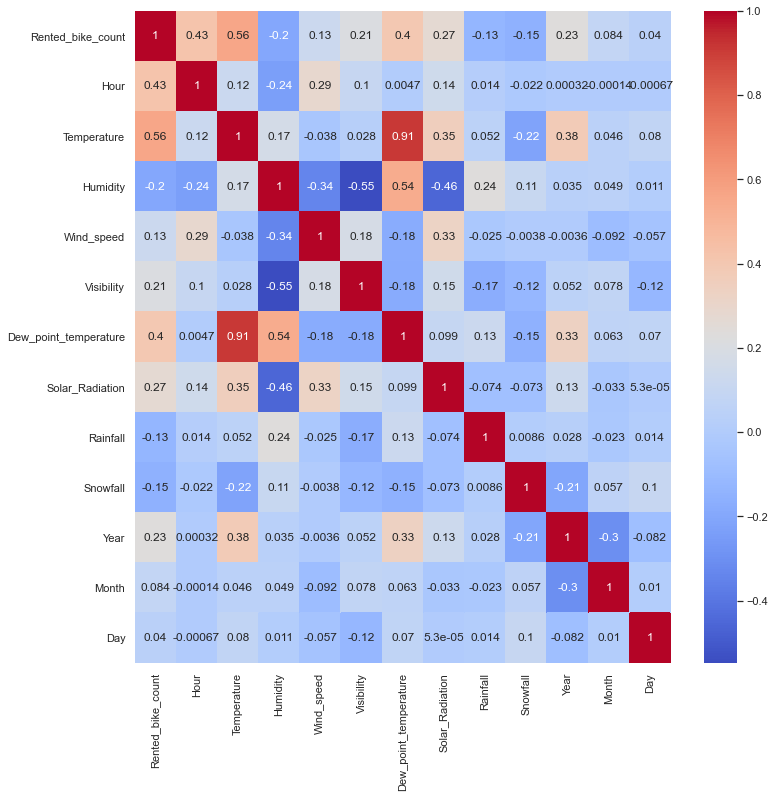

In [135]:
cor = data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

On peut voir que les colonnes "Temperature" et "Dew_point_temperature" sont extrêmement corrélées. On va donc supprimer cette dernière colonne.

In [136]:
data = data.drop(columns="Dew_point_temperature")
data

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Year,Month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,2018,11,30


## Dépendance statistique avec la variable target "Rented Bike Count"

### Nous réalisons un test de Pearson entre notre variable Target "Rented Bike Count" et les autres variables quantitatives du dataframe afin d'évaluer la dépendance entre les deux variables

Les p_values sont toutes < 5%, il y a donc une relation significative entre les variables quantitatives de notre DataFrame et la varibale target

In [137]:
from scipy.stats import pearsonr 
columns=["Temperature","Humidity","Wind_speed","Visibility","Solar_Radiation","Rainfall","Snowfall"]   
for col in columns:
    print(pd.DataFrame(pearsonr(data["Rented_bike_count"],data[col]),index=["pearson_coef","p_value"],columns=[col]))

              Temperature
pearson_coef      0.56274
p_value           0.00000
                  Humidity
pearson_coef -2.019727e-01
p_value       1.241129e-78
                Wind_speed
pearson_coef  1.250219e-01
p_value       7.704373e-31
                Visibility
pearson_coef  2.123228e-01
p_value       6.895319e-87
              Solar_Radiation
pearson_coef     2.738616e-01
p_value         1.692193e-145
                  Rainfall
pearson_coef -1.286261e-01
p_value       1.469221e-32
                  Snowfall
pearson_coef -1.516108e-01
p_value       1.049056e-44


### Test Anova pour analyser la relation entre les variables qualitatives et la variable target qui est quantitative

Les p-values sont < 5%

In [138]:
import statsmodels.api
result = statsmodels.formula.api.ols('Rented_bike_count ~ Seasons', data = data).fit() 
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Seasons,3.0,8.273756e+08,2.757919e+08,875.601073,0.0
Residual,8461.0,2.664998e+09,3.149743e+05,NaN,NaN


In [139]:
import statsmodels.api
result = statsmodels.formula.api.ols('Rented_bike_count ~ Holiday', data = data).fit() 
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Holiday,1.0,1.714688e+07,1.714688e+07,41.756703,1.090780e-10
Residual,8463.0,3.475227e+09,4.106377e+05,NaN,NaN


# Machine Learning

In [140]:
import numpy as np

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error


In [141]:
# Dummies 
data['Hour'] = data['Hour'].astype(str)
data=data.drop(columns="Date")
data=pd.get_dummies(data,sparse=True)

In [142]:
data

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Month,...,Hour_6,Hour_7,Hour_8,Hour_9,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,...,0,0,0,0,0,0,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,...,0,0,0,0,0,0,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,...,0,0,0,0,0,0,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,...,0,0,0,0,0,0,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,2018,11,...,0,0,0,0,1,0,0,0,0,1
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,2018,11,...,0,0,0,0,1,0,0,0,0,1
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,2018,11,...,0,0,0,0,1,0,0,0,0,1
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,2018,11,...,0,0,0,0,1,0,0,0,0,1


In [143]:
data.columns

Index(['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year',
       'Month', 'Day', 'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')

In [144]:
# On va subdiviser notre étude sur plusieurs périmètres avec à chaque fois des différentes variables 

dataset=data

dataset1 = data.copy().drop(['Humidity', 'Rainfall', 'Snowfall'], axis = 1)  # Sans les variables dont la corrélation est négative

dataset2 =  data[["Rented_bike_count",'Temperature']]  #Avec les variables les plus corrélée à la variable target

In [145]:
X= data.drop(columns = 'Rented_bike_count')
X1 = dataset1.drop(columns = 'Rented_bike_count')
X2= dataset2.drop(columns = "Rented_bike_count")
y = data["Rented_bike_count"]


# Régression linéaire

In [146]:
#Split des données
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y, test_size=0.2,random_state=42)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y, test_size=0.2,random_state=42)

#Scale des données 
def ScaleData(x_train,x_test):
    scaler =  preprocessing.StandardScaler(with_mean=False)
    scaler.fit(x_train)             
    x_train = scaler.transform(x_train, copy = False)
    x_test  = scaler.transform(x_test, copy = False)
    
ScaleData(X_train,X_test)   
ScaleData(X1_train,X1_test)
ScaleData(X2_train,X2_test)

# Model de regression linéaire multiple

#Fonction qui nous retourne les metrics pour évaluer notre modèle 

def score_metrics(y_test,pred):
    mae = mean_absolute_error(y_test**2,pred**2)
    print('mean absolute error is  :',mae)
    mse = mean_squared_error(y_test**2,pred**2)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))
    print("R2 score is  :",r2_score(y_test**2,pred**2))
    
    
# Fonction du modèle 

def LinReg(x_train,x_test,y_train,y_test):
    regression = LinearRegression()
    regression.fit(x_train,y_train)
    print('score train : ', regression.score(x_train,y_train))
    print('score test :', regression.score(x_test, y_test))
    reg_pred = regression.predict(x_test)
    score_metrics(y_test,reg_pred)

print("\n")

LinReg(X_train,X_test,y_train,y_test)   
    
print("\n Pour notre deuxième dataset \n") 

LinReg(X1_train,X1_test,y1_train,y1_test)   

print(" \n Pour notre troisième dataset \n") 

LinReg(X2_train,X2_test,y2_train,y2_test)





score train :  0.6614760895806244
score test : 0.6652773441455361
mean absolute error is  : 502040.6058586664
mean squared error is  : 885073432553.3466
Root mean squared error is  : 940783.414263531
R2 score is  : 0.5630734308741695

 Pour notre deuxième dataset 

score train :  0.6277209417276309
score test : 0.6338625321210347
mean absolute error is  : 519374.9824289494
mean squared error is  : 938407564256.6521
Root mean squared error is  : 968714.3873488471
R2 score is  : 0.5367444299965775
 
 Pour notre troisième dataset 

score train :  0.31467928591123917
score test : 0.32488243123316574
mean absolute error is  : 722124.1431036373
mean squared error is  : 1693389545905.114
Root mean squared error is  : 1301303.0184799826
R2 score is  : 0.16403898561120367


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFram

## Régression linéaire régularisée : Ridge, Lasso  

#### Ridge 

In [147]:
# Nous allons prendre en compte uniquement le premier dataset pour utiliser le modèle de Ridge

#Pour obtenir le meilleur modèle prédictif possible, il est préférable 
#d'utiliser la classe RidgeCV à qui l'on donne dans le paramètre alphas
#une liste de valeurs pour  α  que la fonction parcourra pour créer et évaluer plusieurs modèles par validation croisée,
#puis sélectionner le  α  entraînant les meilleures performances.

from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas= (1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2, 0.1, 0.3, 0.7, 1, 10, 50, 100, 4000,10000))
ridge_reg.fit(X_train, y_train) 

print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train, y_train))
print('score test :', ridge_reg.score(X_test, y_test))

ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print('mse train :', mean_squared_error(ridge_pred_train, y_train))
print('mse test :', mean_squared_error(ridge_pred_test, y_test))



alpha sélectionné par c-v : 1.0
score train : 0.661471917890709
score test : 0.6652461525502631
mse train : 141347.76775396478
mse test : 131419.79528153499


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



#### Lasso

In [148]:
# Nous allons utiliser la regression lasso avec un alpha=1

from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0)

lasso_r.fit(X_train, y_train)

print('score train :', lasso_r.score(X_train, y_train))
print('score test :', lasso_r.score(X_test, y_test))

lasso_pred_train = lasso_r.predict(X_train)
lasso_pred_test = lasso_r.predict(X_test)

print('mse train :', mean_squared_error(lasso_pred_train, y_train))
print('mse test :', mean_squared_error(lasso_pred_test, y_test))


<ipython-input-148-76d613608c30>:7: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.



score train : 0.6614760886609716
score test : 0.6652776737678592
mse train : 141346.0263059208
mse test : 131407.42048137943


C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 478597645.07184625, tolerance: 282755.59216999414

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



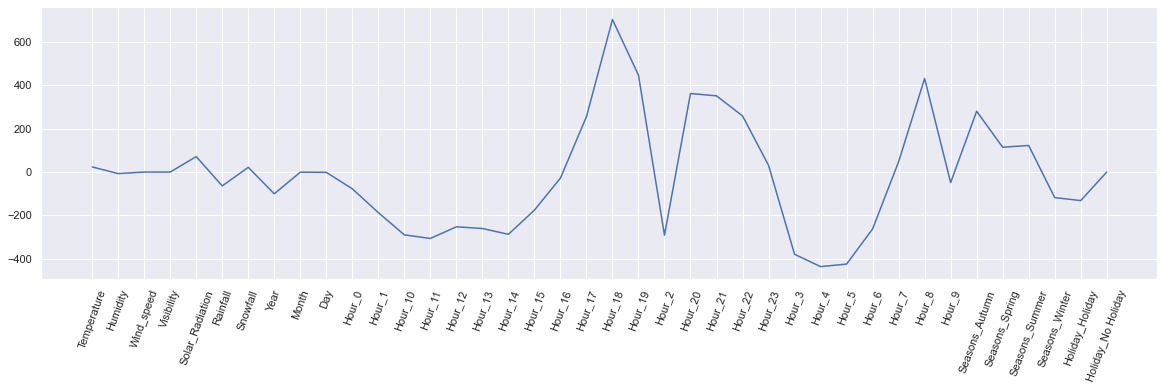

In [149]:
lasso_coef = lasso_r.coef_

plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=70);


In [150]:
lasso_r.coef_ #Nous constatons que toutes les variables ont été séléctionnées par Lasso, pas de coefs nuls 

array([ 2.38019889e+01, -7.17214892e+00,  5.06104618e-02, -1.61592293e-03,
        7.13358528e+01, -6.40830382e+01,  2.18161066e+01, -1.00460281e+02,
       -5.74977400e-01, -1.35228554e+00, -7.73395720e+01, -1.87221877e+02,
       -2.89997469e+02, -3.06669740e+02, -2.52833062e+02, -2.60660675e+02,
       -2.87437034e+02, -1.76004080e+02, -2.79659636e+01,  2.55515594e+02,
        7.04389016e+02,  4.47362467e+02, -2.91342205e+02,  3.62698631e+02,
        3.51941410e+02,  2.59239207e+02,  3.11503811e+01, -3.79792857e+02,
       -4.36644023e+02, -4.25043402e+02, -2.62768235e+02,  4.75443189e+01,
        4.32122494e+02, -4.85200706e+01,  2.80787136e+02,  1.14675650e+02,
        1.22684218e+02, -1.17900794e+02, -1.31800121e+02, -3.65411506e-11])

In [151]:
#Nous disposons ainsi de scénarios de solutions pour différentes valeurs de  αα . Mais nous ne savons pas laquelle est la plus performante en prédiction.
#Il existe, tout comme pour la régression Ridge, une classe LassoCV qui permet de
#trouver le  αα  optimal en fonction de la performance prédictive, par validation croisée.

from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas=(1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2, 0.1, 0.3, 0.7, 1, 10, 50, 100, 4000,10000),cv=10).fit(X_train, y_train)

pred_test = model_lasso.predict(X_test)

print( 'Alpha chosi par Lasso : ', model_lasso.alpha_)
print('score test :', model_lasso.score(X_test, y_test))
print('mse test :', mean_squared_error(pred_test, y_test))


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 420012837.0938806, tolerance: 254190.41071816545

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 427118832.59168977, tolerance: 254190.41071816545

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 416530048.5924462, tolerance: 253294.41513514935

C:\Users\33666\anaconda3\lib\site-packages\sklear

Alpha chosi par Lasso :  0.1
score test : 0.6652265874984444
mse test : 131427.47625405935


C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 433864471.80248225, tolerance: 254288.83542615257

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 430864402.4411466, tolerance: 256107.912434717

C:\Users\33666\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 435215298.74031144, tolerance: 256107.912434717

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\u

# Support Vector Machine Regression

In [38]:
parameters = {'C': [0.1, 1.1, 1001],
              'gamma':[0.001,0.01, 0.025, 0.05, 0.75, 0.1, 0.25, 0.5,1]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train,y_train)
print('Best r2 accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma & C : ' + str(grid.best_estimator_))

C:\Users\hhp\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



Best r2 accuracy : 51.37% with Gamma & C : SVR(C=1001, gamma=0.001)


# Decision Tree

In [152]:
# Decision Tree:

from sklearn.tree import DecisionTreeRegressor 

regressor_model = DecisionTreeRegressor(random_state = 0)

regressor_model.fit(X_train,y_train)

print('score train: ', regressor_model.score(X_train, y_train))
print('score test: ', regressor_model.score(X_test, y_test))

regressor_pred_train = regressor_model.predict(X_train)
regressor_pred_test = regressor_model.predict(X_test)

print('mse train :', mean_squared_error(regressor_pred_train, y_train))
print('root mse test :', mean_squared_error(regressor_pred_test, y_test,squared=False))



score train:  1.0
score test:  0.7415423651605764
mse train : 0.0
root mse test : 318.5387616998235


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [153]:
# Decision Tree Classifier:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [154]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                    random_state = 100,
                                    max_depth = 3,
                                    min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [155]:

y_pred_en = clf_entropy.predict(X_test)
y_pred_en


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



array([928, 848,  17, ...,  17, 928, 848], dtype=int64)

In [156]:
print(("Accuracy:"), accuracy_score(y_test, y_pred_en)*100, ("%"))

Accuracy: 0.11813349084465447 %


# Bagging

In [157]:
from sklearn.ensemble import BaggingRegressor
bg_model=BaggingRegressor()
bg_model.fit(X_train,y_train)

y_pred=bg_model.predict(X_test)

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [158]:
print('score train: ', bg_model.score(X_train, y_train)*100,"%")
print('score test: ', bg_model.score(X_test, y_test)*100,"%")

score train:  97.32067315385038 %
score test:  83.63407222927695 %


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [159]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8363407222927696

In [160]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared = False)

253.47662715501144

Nous obtenons des bons scores pour le bagging.

Text(0, 0.5, 'Prediction')

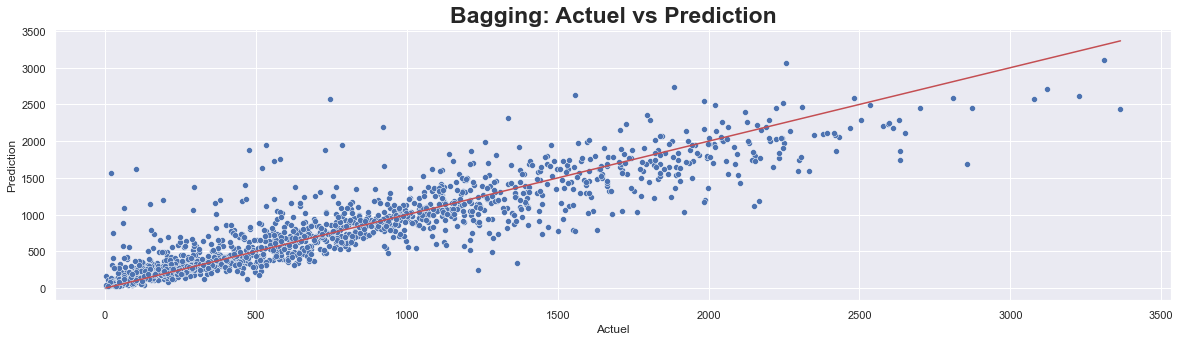

In [161]:
fig,ax = plt.subplots()

scatter = sns.scatterplot(x=y_test, y=y_pred)
line = sns.lineplot(x=[min(y_test),max(y_test)], y=[min(y_test),max(y_test)],color="r")

plt.title('Bagging: Actuel vs Prediction',fontsize=23, fontweight="bold")
plt.xlabel('Actuel')
plt.ylabel('Prediction')             

# RandomForestRegressor

In [162]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [163]:
print('score train: ', rf_model.score(X_train, y_train)*100,"%")
print('score test: ', rf_model.score(X_test, y_test)*100,"%")

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



score train:  98.08323764062936 %
score test:  85.27606812026087 %


In [164]:
r2_score(y_test,y_pred)

0.8527606812026087

In [165]:
mean_squared_error(y_test,y_pred,squared = False)

240.42493334537656

Random Forest est notre meilleur modèle pour l'instant.

Text(0, 0.5, 'Prediction')

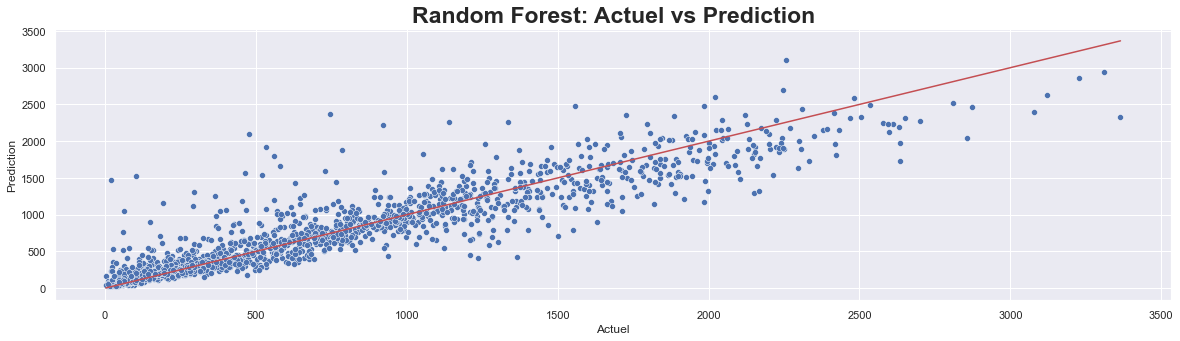

In [166]:
fig,ax = plt.subplots()

scatter = sns.scatterplot(x=y_test, y=y_pred)
line = sns.lineplot(x=[min(y_test),max(y_test)], y=[min(y_test),max(y_test)],color="r")

plt.title('Random Forest: Actuel vs Prediction',fontsize=23, fontweight="bold")
plt.xlabel('Actuel')
plt.ylabel('Prediction')     

In [167]:
from sklearn.model_selection import cross_val_score

cvRF_mean = cross_val_score(estimator = RandomForestRegressor(), X = X_train, y = y_train, cv = 5)


cvDT_mean = cross_val_score(estimator = DecisionTreeRegressor(), X = X_train, y = y_train, cv = 5)


cvBG_mean = cross_val_score(estimator = BaggingRegressor(), X = X_train, y = y_train, cv = 5)


print("Cross Score Validation pour RandomForestRegressor",cvRF_mean.mean()*100,"%")
print("Cross Score Validation pour DecisionTreeRegressor",cvDT_mean.mean()*100,"%")
print("Cross Score Validation pour BaggingRegressor",cvBG_mean.mean()*100,"%")

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFram

Cross Score Validation pour RandomForestRegressor 86.14802299742188 %
Cross Score Validation pour DecisionTreeRegressor 74.79894741831353 %
Cross Score Validation pour BaggingRegressor 84.88473872918703 %


C:\Users\33666\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



Notre meilleur modèle est donc le RandomForestRegressor().

### API : RandomForestRegressor()

In [168]:
import pickle
import requests 
import json

In [169]:
pickle.dump(rf_model, open('model.pkl','wb'))

In [182]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[35.60, 44.00, 2.40, 1860.00, 1.69, 0.00, 0.00, 2018.00, 7.00, 8.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00]]))

[1152.03]


In [183]:
X_test.columns

Index(['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year', 'Month', 'Day',
       'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')

In [184]:
X_test.loc[5993]

Temperature             35.60
Humidity                44.00
Wind_speed               2.40
Visibility            1860.00
Solar_Radiation          1.69
Rainfall                 0.00
Snowfall                 0.00
Year                  2018.00
Month                    7.00
Day                      8.00
Hour_0                   0.00
Hour_1                   0.00
Hour_10                  0.00
Hour_11                  0.00
Hour_12                  0.00
Hour_13                  0.00
Hour_14                  0.00
Hour_15                  0.00
Hour_16                  0.00
Hour_17                  1.00
Hour_18                  0.00
Hour_19                  0.00
Hour_2                   0.00
Hour_20                  0.00
Hour_21                  0.00
Hour_22                  0.00
Hour_23                  0.00
Hour_3                   0.00
Hour_4                   0.00
Hour_5                   0.00
Hour_6                   0.00
Hour_7                   0.00
Hour_8                   0.00
Hour_9    